In [1]:
import gurobipy as GRB
import numpy as np
import math
from scipy.optimize import root,minimize
import itertools
import matplotlib.pyplot as plt

In [75]:
def infNorm(vec):
    return(max(abs(np.array(vec))))

def pre_process(U,N,d,n,v_p):
    loss = np.dot(U,v_p.T)/infNorm(np.dot(U,v_p.T))
    v = v_p/infNorm(np.dot(U,v_p.T))
    i_star = np.where(loss==max(loss))
    loss_t = []
    for i in range(n):
        v_n = v+np.random.normal(0,1,d)
        loss_t.append(np.dot(U,v_n.T)/infNorm(np.dot(U,v_n.T)))
    return loss, np.array(loss_t), i_star

def baselineAlg(loss,loss_t,i_star,U,N,d,n):
    rt = np.zeros(n)
    items = np.zeros(n)
    xt = np.zeros(N)
    ixt = np.zeros(N)
    sjt = np.zeros(N)
    
    for i in range(N):
        alpha_t = np.sqrt(np.log(N)/(i+1))
        items[i] = i+1
        xt[i] = loss_t[i][i]
        rt[i]=(loss[i_star]-loss[i])
    for j in range(N,n):
        alpha_t = np.sqrt(np.log(N)/(j+1))
        if (j+1)%N !=0:
            items[j]=items[((j+1)%N)-1]
            ixt[((j+1)%N)-1]+=loss_t[j][((j+1)%N)-1]
            xt[((j+1)%N)-1] = ixt[((j+1)%N)-1]/((j+1)//N+1)
            sjt[((j+1)%N)-1] = xt[((j+1)%N)-1]+np.sqrt(alpha_t*np.log(n)/(2*((j+1)//N+1)))
        else:
            items[j]=items[N-1]
            ixt[N-1]+=loss_t[j][N-1]
            xt[N-1]=ixt[N-1]/(j//N+1)
            sjt[N-1] = xt[N-1]+np.sqrt(alpha_t*np.log(n)/(2*((j+1)//N+1)))
        jt = int(np.where(sjt== max(sjt))[0])
        rt[j]=(loss[i_star]-loss[jt])
    return rt

def findMaxDet(U,v_p):
    N,d = U.shape
    CombU = []
    detCombU = []
    indexU = []
    for iindex in itertools.permutations(np.arange(N),d):
        indexU.append(np.array(iindex))
    for iCombU in itertools.permutations(U,d):
        CombU.append(np.array(iCombU))
        detCombU.append(abs(np.linalg.det(np.array(iCombU))))
    return np.array(CombU)[np.where(detCombU==max(detCombU))][0],np.array(indexU)[np.where(detCombU==max(detCombU))][0]

def ourAlg(V,index,loss,loss_t,i_star,U,N,d,n):
    rt = np.zeros(n)
    items = np.zeros(n)
    xt = np.zeros(d)
    ixt = np.zeros(d)
    sjt = np.zeros(d)
    for i in range(d):
        items[i] = i+1
        xt[i] = loss_t[i][index[i]]
        rt[i]=(loss[i_star]-loss[i])
    for j in range(d,n):
        if (j+1)%d !=0:
            items[j]=items[((j+1)%d)-1]
            ixt[((j+1)%d)-1]+=loss_t[j][index[((j+1)%d)-1]]
            xt[((j+1)%d)-1] = ixt[((j+1)%d)-1]/(((j+1)//d)*((j+1)%d)+1)
        else:
            items[j]=items[d-1]
            ixt[d-1]+=loss_t[j][index[d-1]]
            xt[d-1]=ixt[d-1]/(((j+1)//d))
        if j==499:
            print(xt)
        sjt = np.dot(U,np.dot(np.linalg.inv(V),xt))
        jt = int(np.where(sjt== max(sjt))[0])
        print(jt)
        rt[j]=(loss[i_star]-loss[jt])
    return rt

In [97]:
N = 30
d = 3
U = np.zeros((N,d))
n = 200
while np.linalg.matrix_rank(U) !=d:
    for iN in range(N):
        U[iN] = np.random.uniform(-1,1,d)
v_p = np.random.uniform(-1,1,d)

In [98]:
loss,loss_t,i_star = pre_process(U,N,d,n,v_p)

In [99]:
baselinePoints = baselineAlg(loss,loss_t,i_star,U,N,d,n)
ourPoints = ourAlg(findMaxDet(U,v_p)[0],findMaxDet(U,v_p)[1],loss,loss_t,i_star,U,N,d,n)

28
28
17
17
17
17
17
17
17
17
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
17
17
17
17
17
17
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


<function matplotlib.pyplot.show(close=None, block=None)>

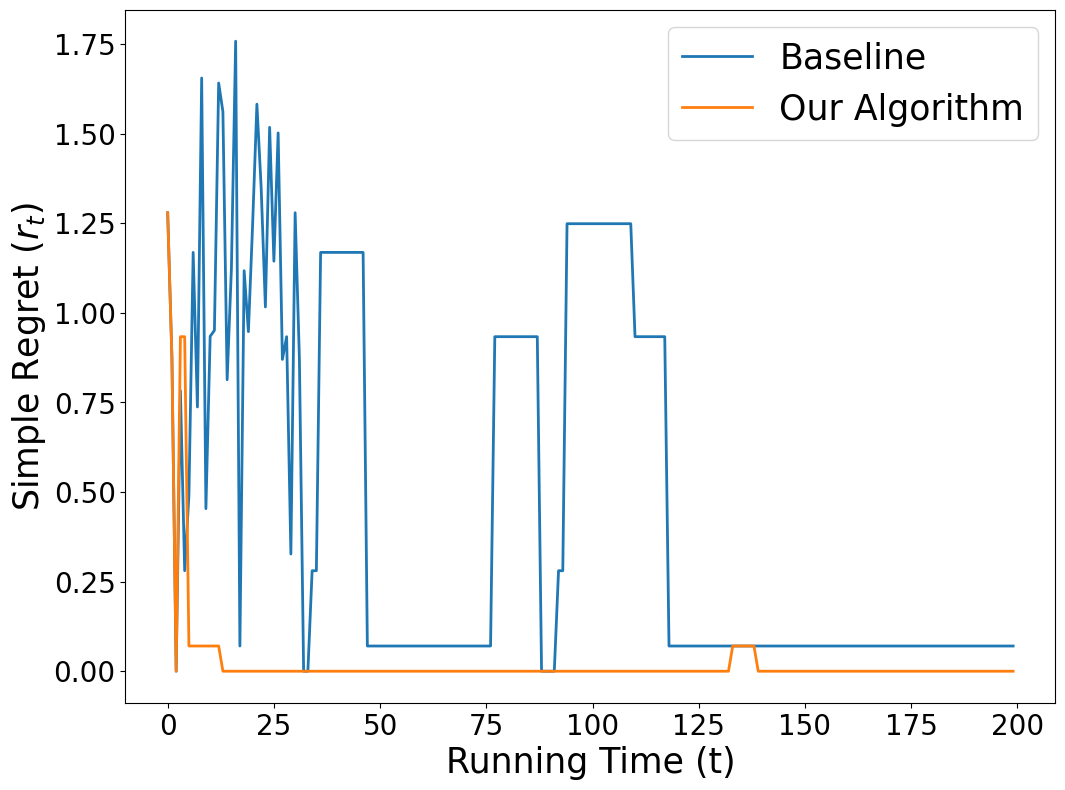

In [109]:
plt.figure(figsize=(12,9))
plt.plot(baselinePoints,label=r'Baseline',linewidth=2,markersize=10)
plt.plot(ourPoints,label=r'Our Algorithm',linewidth=2, markersize=10)
plt.xlabel(r'Running Time (t)',fontsize = 25)
plt.ylabel(r'Simple Regret ($r_t$)',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25)
plt.savefig(r'figure1.png',dpi=600)
plt.show